### DATA ANALYSIS
Convert data/fma_metadata/tracks.csv to a simpler data/train_labels.csv file where the first column is the track_id and the second column is the target musical genre.

C:\Users\defne\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead


Genre distribution of the dataset
____________________________
Genre              # of songs
____________________________
Rock                   7097
Electronic             6311
Experimental           2250
Hip-Hop                2192
Folk                   1518
Instrumental           1349
Pop                    1186
International          1018
Classical               619
Old-Time / Historic     510
Jazz                    384
Country                 178
Soul-RnB                154
Spoken                  118
Blues                    74
Easy Listening           21
Name: genre, dtype: int64
____________________________
total                24979


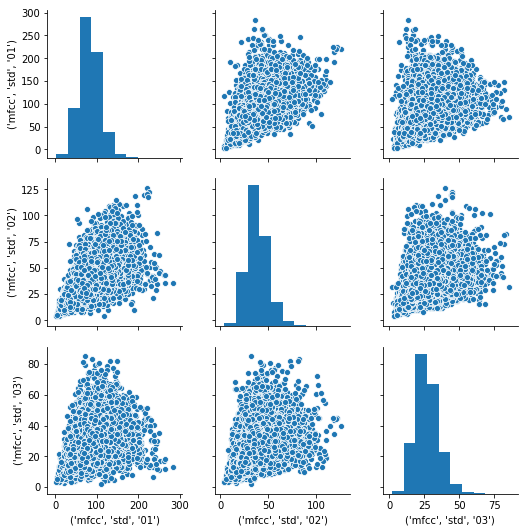

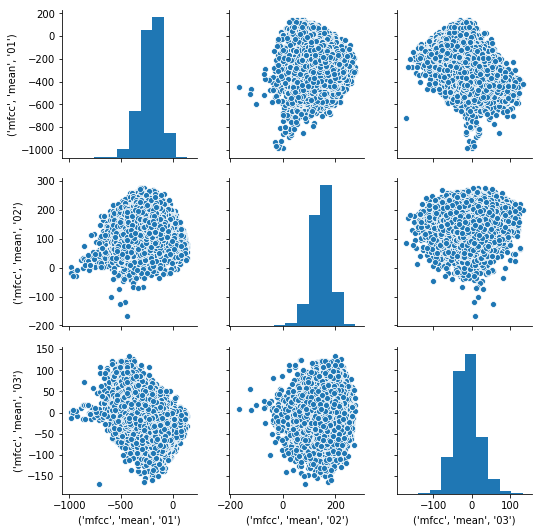

In [6]:
import os
import ast
import pandas as pd

tracks = pd.read_csv('data/fma_metadata/tracks.csv', index_col=0, header=[0, 1])
COLUMNS = [('track', 'tags'), ('album', 'tags'), ('artist', 'tags'), ('track', 'genres'), ('track', 'genres_all')]
for column in COLUMNS:
    tracks[column] = tracks[column].map(ast.literal_eval)

COLUMNS = [('track', 'date_created'), ('track', 'date_recorded'),
            ('album', 'date_created'), ('album', 'date_released'),
            ('artist', 'date_created'), ('artist', 'active_year_begin'),
            ('artist', 'active_year_end')]
for column in COLUMNS:
    tracks[column] = pd.to_datetime(tracks[column])

SUBSETS = ('small', 'medium', 'large')
tracks['set', 'subset'] = tracks['set', 'subset'].astype('category', categories=SUBSETS, ordered=True)

COLUMNS = [('track', 'genre_top'), ('track', 'license'), ('album', 'type'), ('album', 'information'), ('artist', 'bio')]
for column in COLUMNS:
    tracks[column] = tracks[column].astype('category')

# Faulty MP3 train files (https://github.com/mdeff/fma/issues/8).
# MP3 train file IDs with 0 second of audio.
FILES_TRAIN_NO_AUDIO = [1486, 5574, 65753, 80391, 98558, 98559, 98560, 98571,
                        99134, 105247, 108925, 126981, 127336, 133297, 143992]
# MP3 train file IDs with less than 30 seconds of audio.
FILES_TRAIN_FAULTY = FILES_TRAIN_NO_AUDIO + [98565, 98566, 98567,
                                             98568, 98569, 108924]

subset = tracks.index[tracks['set', 'subset'] <= 'medium']
labels = tracks.loc[subset, ('track', 'genre_top')]
labels.name = 'genre'
for i in FILES_TRAIN_FAULTY:
    if i in labels.index:
        labels = labels.drop(i)
        
print("""Genre distribution of the dataset
____________________________
Genre              # of songs
____________________________""")
print(labels.value_counts())
print("""____________________________
total               """, labels.count())

#features = pd.read_csv('data/features.csv', index_col=0, header=[0, 1, 2])[:25000]
features = pd.read_csv('data/fma_metadata/features.csv', index_col=0, header=[0, 1, 2])

features.head(5).style.format('{:.2f}')

sns.pairplot(features.loc[:, ('mfcc', 'std', slice('01','03'))]);
sns.pairplot(features.loc[:, ('mfcc', 'mean', slice('01','03'))]);


train_labels = labels.sample(frac=0.8)
temp_labels = labels.drop(train_labels.index)
valid_labels = temp_labels.sample(frac=0.5)
test_labels = test_labels = temp_labels.drop(valid_labels.index)
labels.to_csv('data/labels_medium.csv', header=True)
train_labels.to_csv('data/train_labels_medium.csv', header=True)
valid_labels.to_csv('data/valid_labels_medium.csv', header=True)
test_labels.to_csv('data/test_labels_medium.csv', header=True)

train_features = features.loc[train_labels.index]
valid_features = features.loc[valid_labels.index]
test_features = features.loc[test_labels.index]

train_features.to_csv('data/train_features_medium.csv', header=True)
valid_features.to_csv('data/valid_features_medium.csv', header=True)
test_features.to_csv('data/test_features_medium.csv', header=True)

# Exploring Features

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

train_features = pd.read_csv('data/train_features_medium.csv', index_col=0, header=[0, 1, 2])

print(train_features.columns)


MultiIndex(levels=[['chroma_cens', 'chroma_cqt', 'chroma_stft', 'mfcc', 'rmse', 'spectral_bandwidth', 'spectral_centroid', 'spectral_contrast', 'spectral_rolloff', 'tonnetz', 'zcr'], ['kurtosis', 'max', 'mean', 'median', 'min', 'skew', 'std'], ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [8]:
valid_features = pd.read_csv('data/valid_features_medium.csv', index_col=0, header=[0, 1, 2])
test_features = pd.read_csv('data/test_features_medium.csv', index_col=0, header=[0, 1, 2])

train_labels = pd.read_csv('data/train_labels_medium.csv')
valid_labels = pd.read_csv('data/valid_labels_medium.csv')
test_labels = pd.read_csv('data/test_labels_medium.csv')

print('Music Genres:', *train_labels.genre.unique())
print("Train: ",train_labels.genre.count())
print("Valid: ",valid_labels.genre.count())
print("Test: ",test_labels.genre.count())

Music Genres: Instrumental Soul-RnB Hip-Hop Rock Experimental Electronic Pop Classical Folk Old-Time / Historic International Country Jazz Blues Spoken Easy Listening
Train:  19983
Valid:  2498
Test:  2498


# Audio Features Exploration
#### Reference: https://musicinformationretrieval.com/

## Zero Crossing Rate (zcr)
### Onsets

In [12]:
onset_frames = librosa.onset.onset_detect(x, sr=sr)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)
onset_samples = librosa.frames_to_samples(onset_frames)

100-ms segments beginning at each onset

In [17]:
frame_sz = int(0.100*sr)
segments = numpy.array([x[i:i+frame_sz] for i in onset_samples])
def concatenate_segments(segments, sr=22050, pad_time=0.300):
    padded_segments = [numpy.concatenate([segment, numpy.zeros(int(pad_time*sr))]) for segment in segments]
    return numpy.concatenate(padded_segments)
concatenated_signal = concatenate_segments(segments, sr)
ipd.Audio(concatenated_signal, rate=sr)


Sort the segments by zero crossing rate, and concatenate the sorted segments.

In [18]:
zcrs = [sum(librosa.core.zero_crossings(segment)) for segment in segments]
ind = numpy.argsort(zcrs)
concatenated_signal = concatenate_segments(segments[ind], sr)
ipd.Audio(concatenated_signal, rate=sr)


## Short-Time Fourier Transform

C:\Users\defne\Anaconda3\lib\site-packages\librosa\core\spectrum.py:960: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


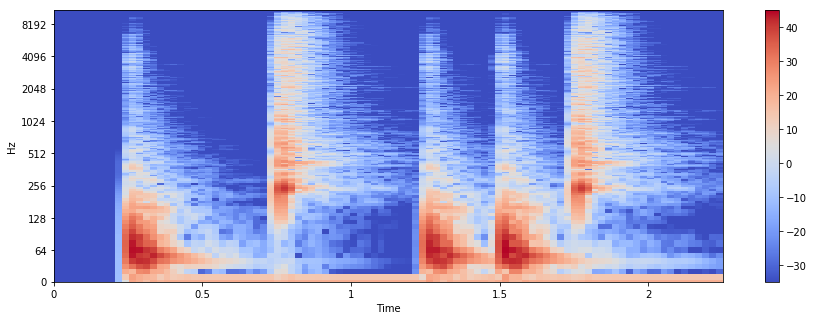

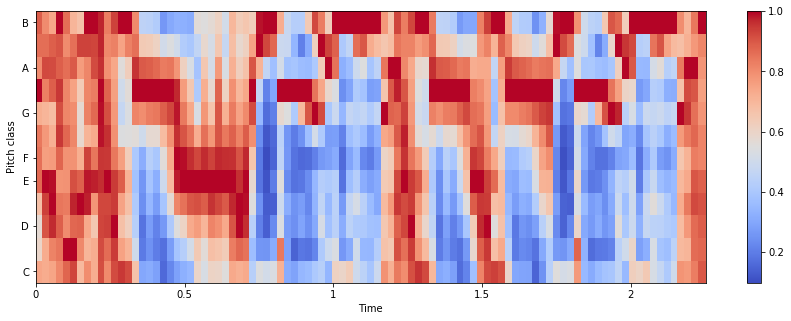

In [2]:
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display

fmin = librosa.midi_to_hz(36)
hop_length = 512

x, sr = librosa.load('data/rock.wav')
X = librosa.stft(x)
Xmag = librosa.amplitude_to_db(X)
plt.figure(figsize=(15, 5))
librosa.display.specshow(Xmag, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()

## Constant Q Tranform

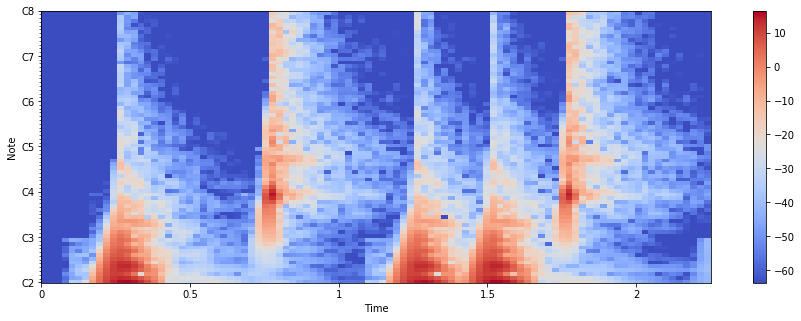

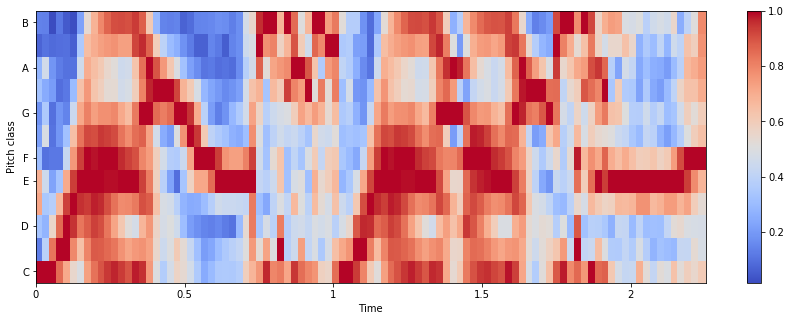

In [6]:
fmin = librosa.midi_to_hz(36)
hop_length = 512
C = librosa.cqt(x, sr=sr, fmin=fmin, n_bins=72, hop_length=hop_length)
logC = librosa.amplitude_to_db(numpy.abs(C))
plt.figure(figsize=(15, 5))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')
plt.colorbar()
chromagram = librosa.feature.chroma_cqt(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()

## Chroma Energy Normalized Statistics (chroma_cens)

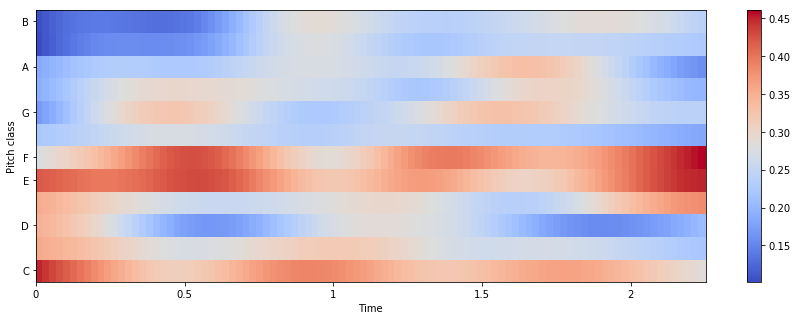

In [130]:
chromagram = librosa.feature.chroma_cens(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()

# Spectral Features
## Spectral Centroid

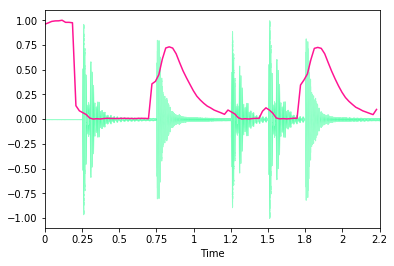

In [82]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
librosa.display.waveplot(x, sr=sr, alpha=0.4, color='springgreen')
plt.plot(t, normalize(spectral_centroids), color='deeppink') # normalize for visualization purposes

## Spectral Bandwidth

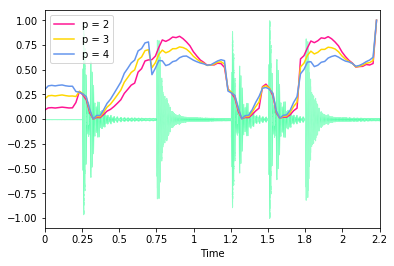

In [91]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4, color='springgreen')
plt.plot(t, normalize(spectral_bandwidth_2), color='deeppink')
plt.plot(t, normalize(spectral_bandwidth_3), color='gold')
plt.plot(t, normalize(spectral_bandwidth_4), color='cornflowerblue')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

## Spectral Contrast

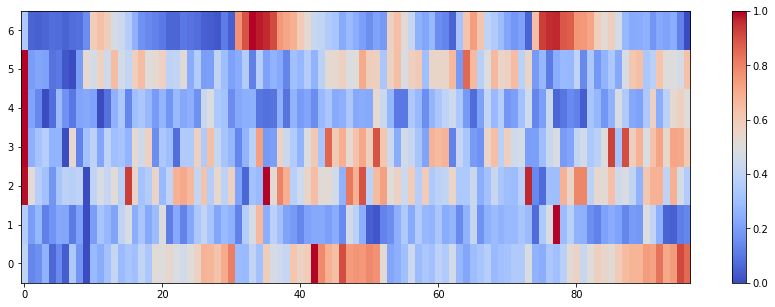

In [131]:
spectral_contrast = librosa.feature.spectral_contrast(x, sr=sr)
plt.figure(figsize=(15, 5))
plt.imshow(normalize(spectral_contrast, axis=1), aspect='auto', origin='lower', cmap='coolwarm')
plt.colorbar()

## Spectral Rolloff

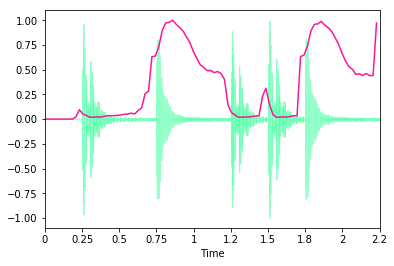

In [96]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4, color='springgreen')
plt.plot(t, normalize(spectral_rolloff), color='deeppink')

## RMSE

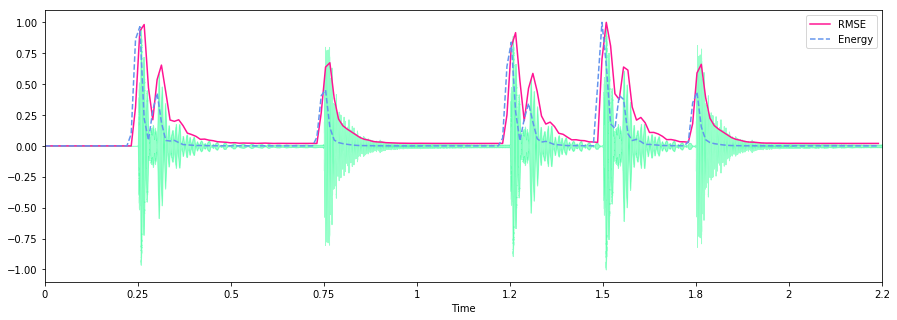

In [134]:
frame_length = 512
hop_length = 256
energy = numpy.array([
    sum(abs(x[i:i+frame_length]**2))
    for i in range(0, len(x), hop_length)
])
rmse = librosa.feature.rmse(x, frame_length=frame_length, hop_length=hop_length, center=True)
rmse = rmse[0]
frames = range(len(energy))
t2 = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sr, alpha=0.4, color='springgreen')
plt.plot(t2, normalize(rmse), color='deeppink')
plt.plot(t2, normalize(energy), linestyle="--", color='cornflowerblue')
plt.legend(('RMSE', 'Energy'))

# MFCC

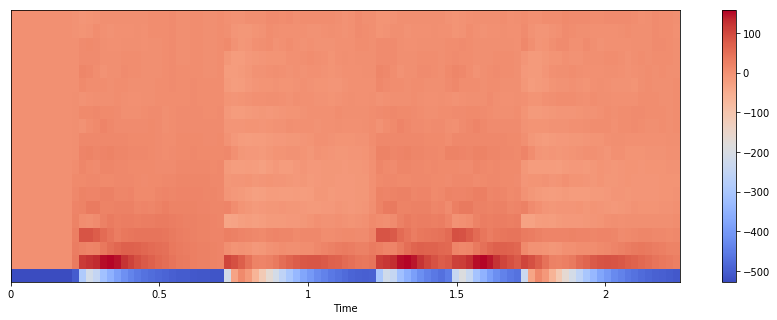

In [132]:
mfccs = librosa.feature.mfcc(x, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()

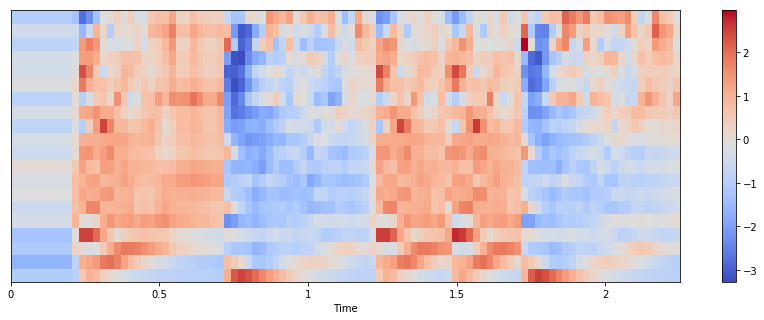

In [133]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()

## TONNETZ

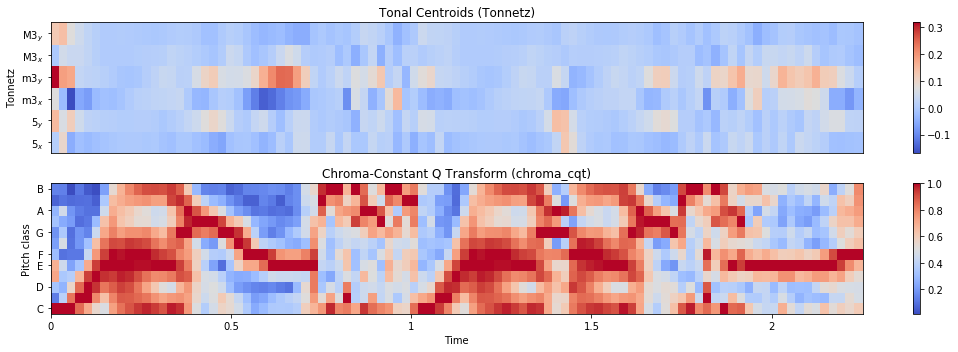

In [22]:
y = librosa.effects.harmonic(x) # useful
y = x
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
librosa.display.specshow(tonnetz, y_axis='tonnetz')
plt.colorbar()
plt.title('Tonal Centroids (Tonnetz)')
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.feature.chroma_cqt(y, sr=sr), y_axis='chroma', x_axis='time', cmap='coolwarm')
plt.colorbar()
plt.title('Chroma-Constant Q Transform (chroma_cqt)')
plt.tight_layout()